# Exploritory data analysis for Netflix data

In [1]:
#--Importing Nessesary Libraries --#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

In [2]:
#--Importing the dataset --#
df= pd.read_csv('/Users/michaelsegaline/Desktop/Netflix study/netflix_titles.csv')

In [3]:
#-- Inspecting the head --#
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#-- Inspecting the Shape --#
df.shape

(8807, 12)

Inspecting the sparsity % per column

In [5]:
def calculate_sparsity(df):
    sparsity = (df.isna().sum() + (df == 0).sum()) / len(df) * 100
    return sparsity

# Example usage:
sparsity_percent = calculate_sparsity(df)
print(sparsity_percent)


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


In [6]:
#-- Inspecting the data types --#
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
#-- Inspecting the durration column --#
df.duration

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [40]:
#-- Ther are no duplicate values --#
#-- Checking for duplicate values--#
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


# Exploring production durrations 

In [8]:
# Assuming your df is already loaded
movies = df[df['duration'].str.contains('min', na=False)]
tv_shows = df[df['duration'].str.contains('Season', na=False)]

In [9]:
# For movies: extract the number of minutes
movies['minutes'] = movies['duration'].str.replace(' min', '').astype(int)

# For tv_shows: extract number of seasons
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)


/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_35299/2841894023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['minutes'] = movies['duration'].str.replace(' min', '').astype(int)
/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_35299/2841894023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)


In [10]:
#-- Bin movie durations --#
movie_bins = pd.cut(movies['minutes'], bins=[0, 60, 90, 120, 150, 180, 1000],
                    labels=['<60 min', '60-90 min', '90-120 min', '120-150 min', '150-180 min', '>180 min'])

#-- Bin TV show seasons --#
tv_bins = pd.cut(tv_shows['seasons'], bins=[0, 1, 2, 3, 4, 5, 10, 20],
                 labels=['1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons', '6-10 Seasons', '11-20 Seasons'])

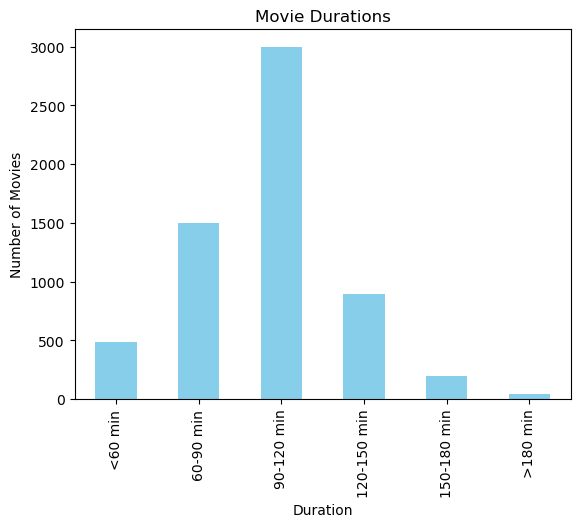

ValueError: Invalid color colors

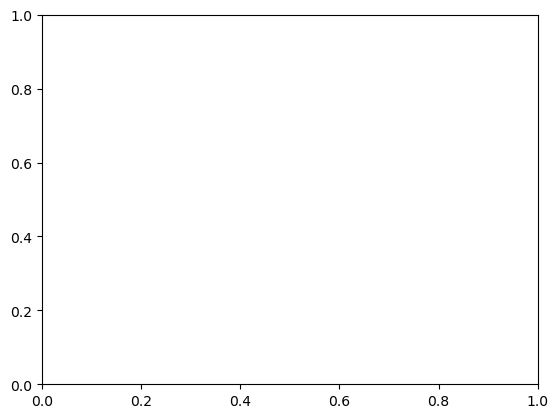

In [29]:
# Movie duration bar chart
movie_bins.value_counts().sort_index().plot(kind='bar', color='skyblue', title='Movie Durations')
plt.ylabel('Number of Movies')
plt.xlabel('Duration')
plt.show()

# TV show seasons bar chart
tv_bins.value_counts().sort_index().plot(kind='bar', color='colors', title='TV Show Seasons')
plt.ylabel('Number of TV Shows')
plt.xlabel('Number of Seasons')
plt.show()

# Exploring Ratings

In [12]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
#-- Defining valid ratings --#
valid_ratings = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 
                 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17']


In [14]:
#-- Filter only rows where rating is valid --#
filtered_df = df[df['rating'].isin(valid_ratings)]

#-- Count the occurrences --#
rating_counts = filtered_df['rating'].value_counts().sort_index()

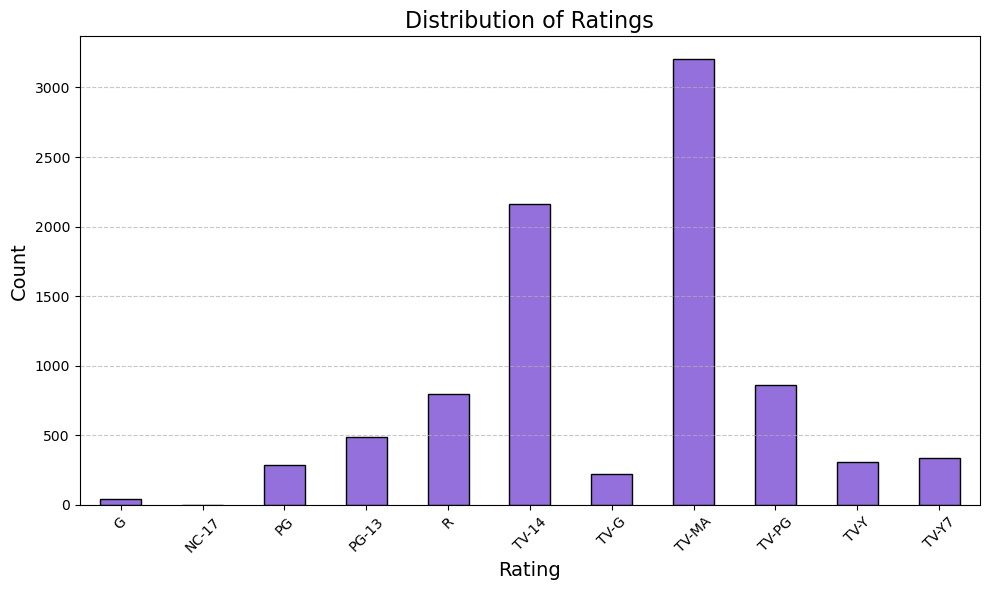

In [15]:
plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
df.rating

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [17]:
num_unique_ratings = len(df.rating.unique())
print(num_unique_ratings)

18


In [18]:
num_unique_cat = len(df.listed_in.unique())
print(num_unique_cat)

514


# Exploring Movie Categories

In [19]:
top_10 = df['listed_in'].value_counts().head(10)
top_10

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

In [20]:
#-- Spliting by comma, expand into separate lists --#

all_categories = df['listed_in'].str.split(',').explode().str.strip()

# Tally each distinct category
category_counts = all_categories.value_counts()

print(category_counts)

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

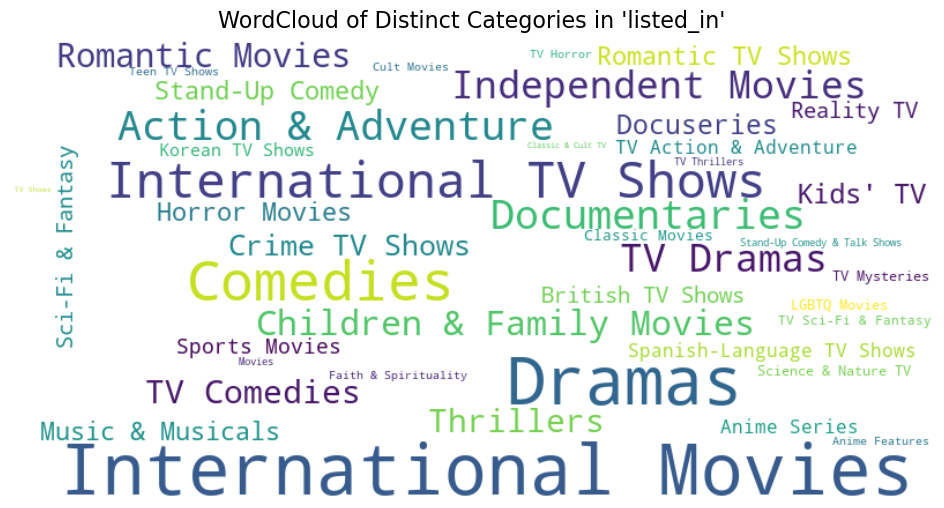

In [21]:
# Step 1: Split, explode, and strip whitespace to get all categories
all_categories = df['listed_in'].str.split(',').explode().str.strip()

# Step 2: Count frequency of each category
category_counts = all_categories.value_counts()

# Step 3: Create a word cloud from the frequency dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)

# Step 4: Display it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Distinct Categories in 'listed_in'", fontsize=16)
plt.show()

# Exploring Category Descriptions in WordClouds

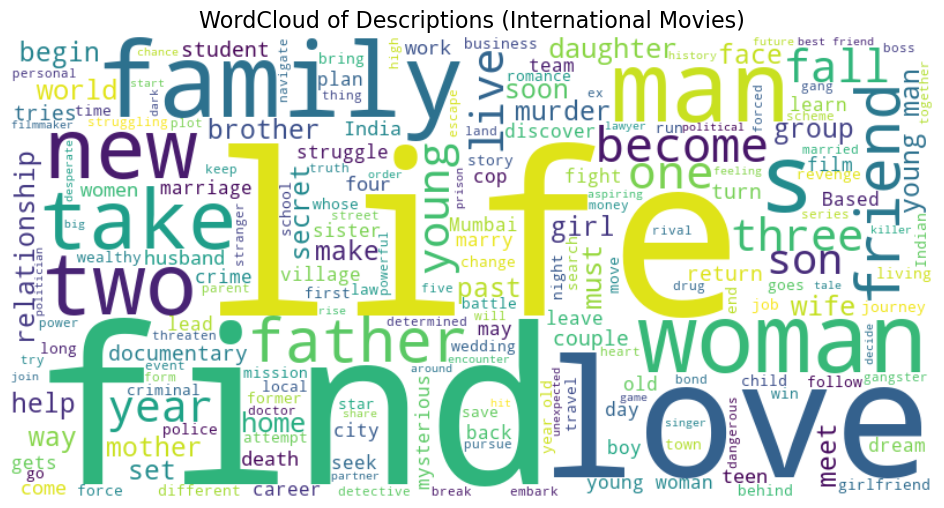

In [22]:
# Step 1: Add your custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['and', 'a', 'an', 'to', 'his', 'in'])  # you can add more as needed

# Step 2: Filter for International Movies category
international_df = df[df['listed_in'].str.contains('International Movies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(international_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (International Movies)", fontsize=16)
plt.show()

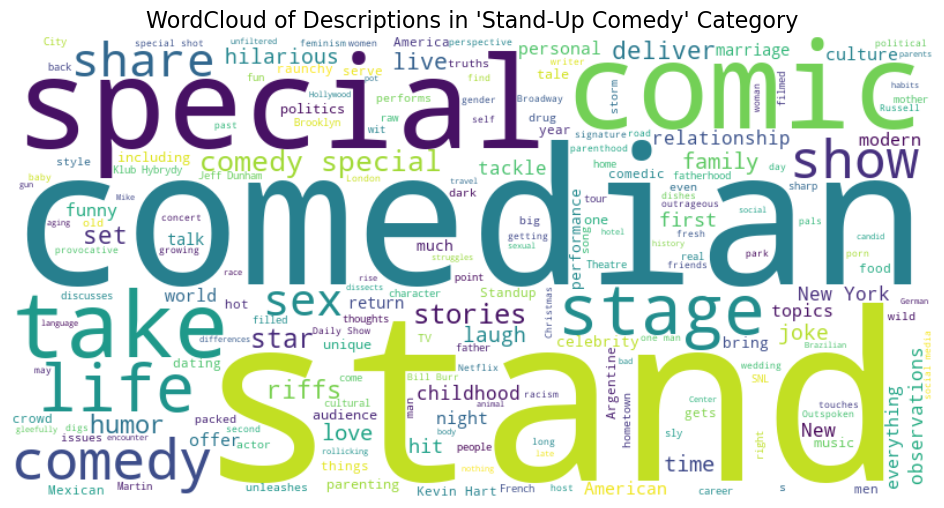

In [23]:
# Step 1: Explode 'listed_in' into individual categories
df_exploded = df.copy()
df_exploded['listed_in'] = df_exploded['listed_in'].str.split(',')
df_exploded = df_exploded.explode('listed_in')
df_exploded['listed_in'] = df_exploded['listed_in'].str.strip()

# Step 2: Filter rows where listed_in is exactly "Comedies"
docu_df = df_exploded[df_exploded['listed_in'] == 'Stand-Up Comedy']

# Step 3: Combine descriptions
text = ' '.join(docu_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud with stopwords

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['and', 'a', 'an', 'to', 'his', 'in'])  # Add more if needed

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Plot it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions in 'Stand-Up Comedy' Category", fontsize=16)
plt.show()


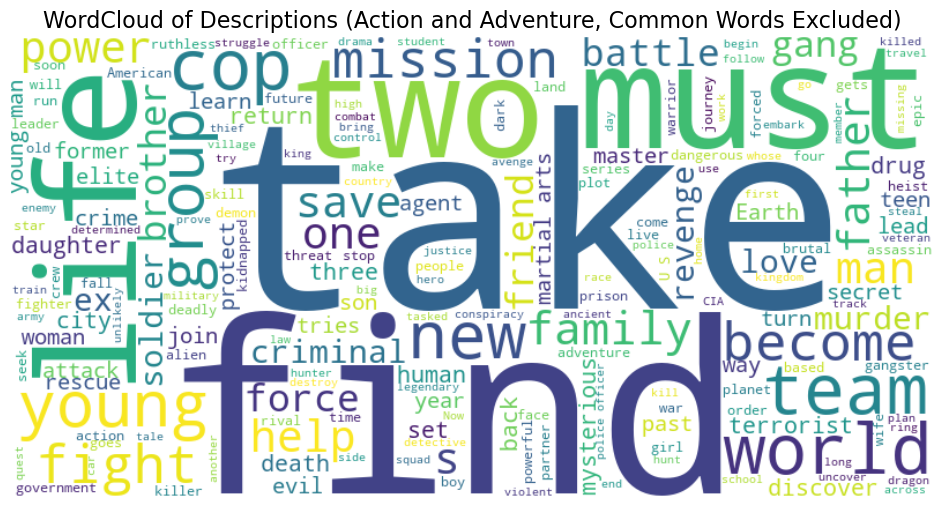

In [24]:
# Step 2: Filter for Action and Adventure category
aa_df = df[df['listed_in'].str.contains('Action & Adventure', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(aa_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Action and Adventure, Common Words Excluded)", fontsize=16)
plt.show()

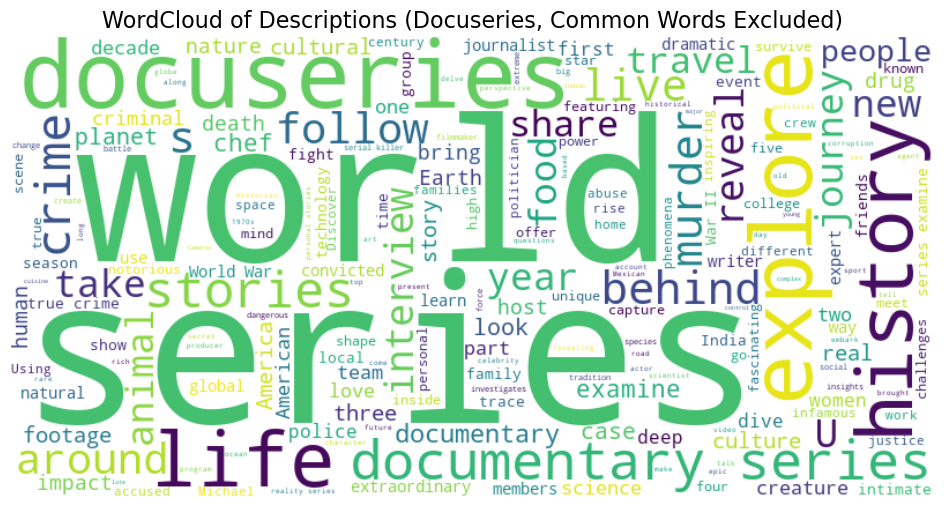

In [25]:
# Step 2: Filter for Docuseries category
tvd_df = df[df['listed_in'].str.contains('Docuseries', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Docuseries, Common Words Excluded)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Action and Adventure category
tvd_df = df[df['listed_in'].str.contains('Documentaries', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Documentaries)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Action and Adventure category
tvd_df = df[df['listed_in'].str.contains('Music & Musicals', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Music & Musicals, Common Words Excluded)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Action and Adventure category
tvd_df = df[df['listed_in'].str.contains('Romantic TV Shows', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Romantic TV Shows, Common Words Excluded)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Action and Adventure category
tvd_df = df[df['listed_in'].str.contains('Horror Movies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Horror Movies)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Reality TV category
tvd_df = df[df['listed_in'].str.contains('Reality TV', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Reality TV)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Sci-Fi & Fantasy category
tvd_df = df[df['listed_in'].str.contains('Sci-Fi & Fantasy', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Sci-Fi & Fantasy, Common Words Excluded)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Sports Movies category
tvd_df = df[df['listed_in'].str.contains('Sports Movies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Sports Movies)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for LGBTQ Movies category
tvd_df = df[df['listed_in'].str.contains('LGBTQ Movies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (LGBTQ Movies )", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Faith & Spirituality Movies category
tvd_df = df[df['listed_in'].str.contains('Faith & Spirituality', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['description'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='orange',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (Faith & Spirituality , Common Words Excluded)", fontsize=16)
plt.show()

# Now exploring the category descriptions

In [ ]:
# Step 2: Filter for International Movies Movies category
tvd_df = df[df['listed_in'].str.contains('International Movies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (International Movies, Common Words Excluded)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Dramas category
tvd_df = df[df['listed_in'].str.contains('Dramas', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Titles (Dramas)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for comedies category
tvd_df = df[df['listed_in'].str.contains('Comedies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Titles (Comedies)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Documentaries category
tvd_df = df[df['listed_in'].str.contains('Documentaries', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Titles (Documentaries)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Action & Adventure category
tvd_df = df[df['listed_in'].str.contains('Action & Adventure', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Titles (Action & Adventure)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for TV Dramas category
tvd_df = df[df['listed_in'].str.contains('TV Dramas', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Descriptions (TV Dramas, Common Words Excluded)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Independent Movies category
tvd_df = df[df['listed_in'].str.contains('Independent Movies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Titles (Independent Movies)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Children & Family Movies  category
tvd_df = df[df['listed_in'].str.contains('Children & Family Movies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Titles (Children & Family Movies)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Romantic Movies category
tvd_df = df[df['listed_in'].str.contains('Romantic Movies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Titles (Romantic Movies)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for TV Comedies category
tvd_df = df[df['listed_in'].str.contains('TV Comedies', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='whitE',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Titles (TV Comedies)", fontsize=16)
plt.show()

In [ ]:
# Step 2: Filter for Thrillers category
tvd_df = df[df['listed_in'].str.contains('Thrillers', na=False)]

# Step 3: Combine descriptions into one text blob
text = ' '.join(tvd_df['title'].dropna().astype(str))

# Step 4: Generate the word cloud excluding stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='whitE',
    stopwords=custom_stopwords
).generate(text)

# Step 5: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Titles (Thrillers)", fontsize=16)
plt.show()

# Exploring the most frequent actors casted

In [35]:
df.cast

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [36]:
# Split the cast strings by comma, ignore NaN
all_cast = df['cast'].dropna().str.split(',').explode().str.strip()


In [37]:
# Count how many times each cast member appears
top_cast = all_cast.value_counts().head(20)

In [38]:
plt.figure(figsize=(12,8))
top_cast.plot(kind='barh', color= colors, edgecolor='black')
plt.title('Top 20 Most Frequent Cast Members', fontsize=16)
plt.xlabel('Number of Appearances', fontsize=14)
plt.gca().invert_yaxis()  # highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'colors' is not defined

<Figure size 1200x800 with 0 Axes>

# Now exploring the number of directors

In [26]:
#-- Split the directors strings by comma, ignore NaN --#
all_dir = df['director'].dropna().str.split(',').explode().str.strip()

In [27]:
# Count how many times each cast member appears
top_dir = all_dir.value_counts().head(20)

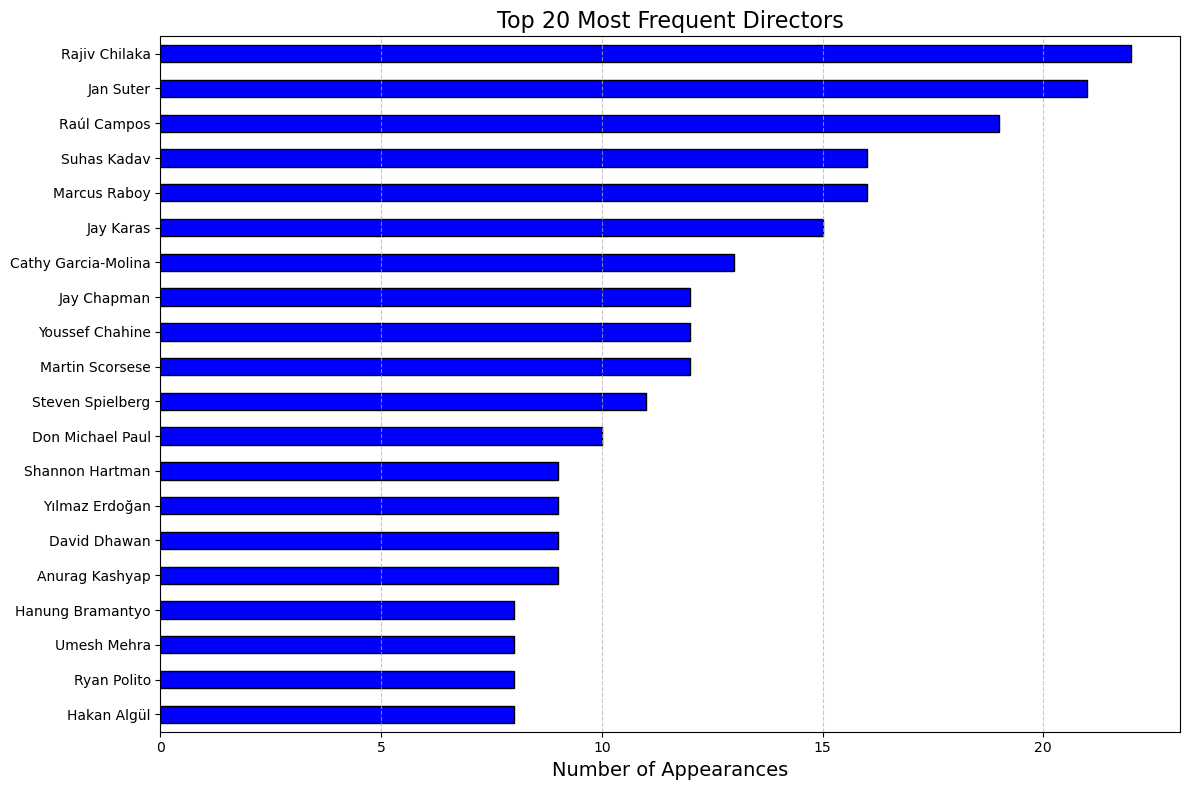

In [34]:
plt.figure(figsize=(12,8))
top_dir.plot(kind='barh', color= "blue", edgecolor='black')
plt.title('Top 20 Most Frequent Directors', fontsize=16)
plt.xlabel('Number of Appearances', fontsize=14)
plt.gca().invert_yaxis()  # highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Now exploring the production type

In [ ]:
#--Dropning nulls, splitting individual words, epxloding words into indivual letters and striping them of white space --#
all_types = df['type'].dropna().str.split(',').explode().str.strip()

In [ ]:
# Count how many times each cast member appears
all_types = all_types.value_counts().head(20)

In [ ]:
plt.figure(figsize=(12,8))
all_types.plot(kind='barh', color='blue', edgecolor='black')
plt.title('Frequency of Production types', fontsize=16)
plt.xlabel('Number of Appearances', fontsize=14)
plt.gca().invert_yaxis()  # highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Exploring Category types

In [41]:
#--Dropning nulls, splitting individual words, epxloding words into indivual letters and striping them of white space --#
cats = df['listed_in'].dropna().str.split(',').explode().str.strip()

In [42]:
# Count how many times each cast member appears
cats = cats.value_counts().head(20)

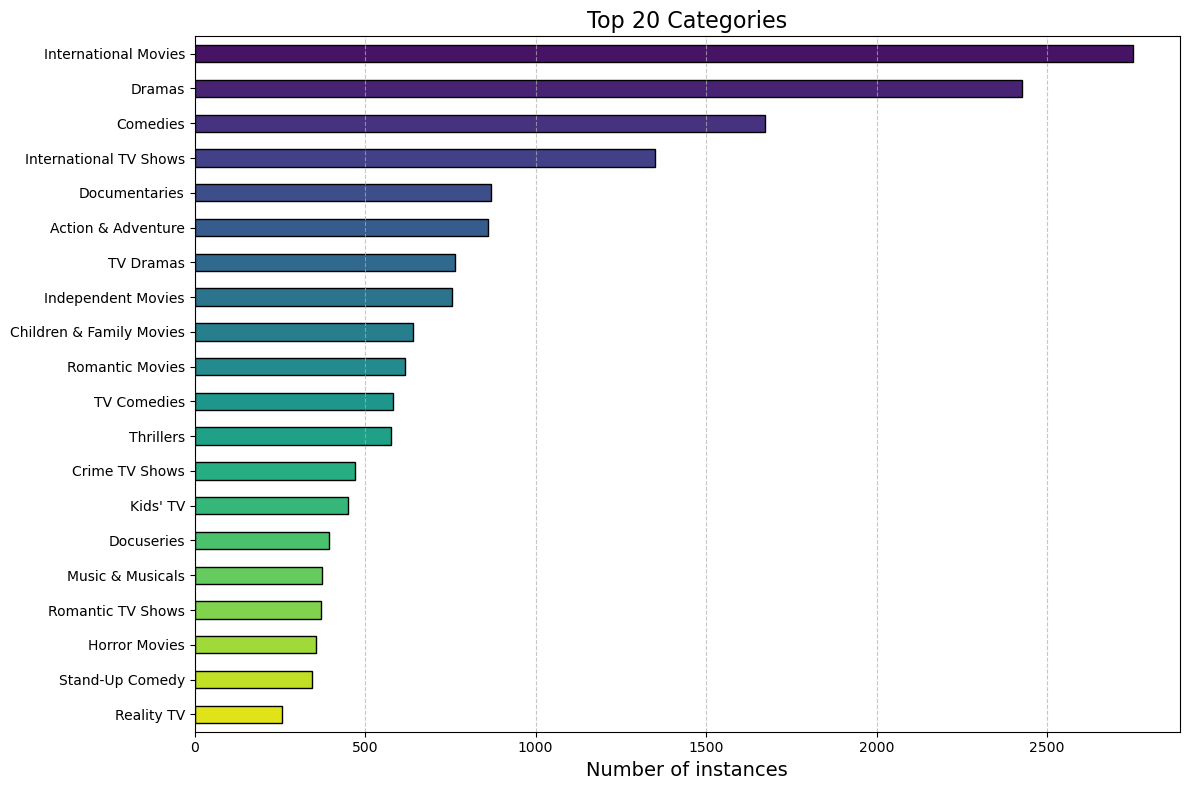

In [43]:
plt.figure(figsize=(12,8))

# Create a list of colors (one for each bar)
colors = sns.color_palette('viridis', len(cats))  # You can change 'viridis' to 'plasma', 'cool', etc.

cats.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Top 20 Categories', fontsize=16)
plt.xlabel('Number of instances', fontsize=14)
plt.gca().invert_yaxis()  # highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Now exploring the countries

In [ ]:
#--Dropning nulls, splitting individual words, epxloding words into indivual letters and striping them of white space --#
nat = df['country'].dropna().str.split(',').explode().str.strip()

In [ ]:
# Count how many times each cast member appears
nat = nat.value_counts().head(20)

In [ ]:
plt.figure(figsize=(12,8))

# Create a list of colors (one for each bar)
colors = sns.color_palette('viridis', len(cats))  # You can change 'viridis' to 'plasma', 'cool', etc.

nat.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Top 20 Most Frequent Countries', fontsize=16)
plt.xlabel('Number of films per country', fontsize=14)
plt.gca().invert_yaxis()  # highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()